In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astropy.io import fits
from astropy.io import ascii

In [2]:
from astroplan.plots import plot_airmass
from astroplan import Observer
from astroplan import FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
observer = Observer.at_site('palomar')

In [3]:
lightcurve = Table.from_pandas(pd.read_csv("light_curve_dd8451da-93c0-4273-bdb0-8000aaf97339.csv"))
lightcurve_ztf = Table.from_pandas(pd.read_csv("table_httpsirsa.ipac.caltech.educgi-bing2pnp.csv"))

In [4]:
filters = np.unique(lightcurve["Camera"])

In [5]:
lightcurve[0]

HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter
float64,str18,str2,float64,float64,str7,float64,float64,float64,str1
2459761.80707,2022-07-01.3012961,bF,1.46,16.619,14.245,0.025,7.285,0.166,g


In [6]:
lightcurve_filtered = []
for i in filters:
    lightcurve_filtered.append(lightcurve[np.where(lightcurve["Camera"] == i)])

In [7]:
for i in lightcurve_filtered:
    print(len(i))

51
75
66
74


In [8]:
from astropy.timeseries import LombScargle

In [9]:
row = lightcurve_ztf
hjd = np.array(row["mjd"])
hjd = hjd.astype("float")
hjd = hjd * u.day
mag = np.array(row["mag"])
for i in range(len(mag)):
    if(">" in str(mag[i])):
        mag[i] = mag[i][1:-1]
mag = np.asarray(mag)
mag = mag.astype("float")
mag = mag * u.mag
mag_err = np.array(row["magerr"])
mag_err = mag_err.astype("float")
mag_err = mag_err * u.mag

In [10]:
ztf_period = 0.110375275900
ztf_frequency = 1/ztf_period
ztf_frequency

9.06000000313476

In [14]:
ideal_frequency = np.linspace(ztf_frequency - 9, ztf_frequency + 4, 10**6) * (1/u.day)

In [15]:
power = LombScargle(hjd, mag , mag_err).power(ideal_frequency)

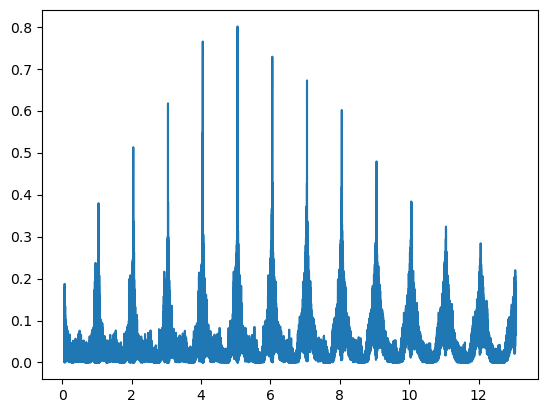

In [16]:
plt.plot(ideal_frequency, power)
#plt.vlines(ztf_frequency, 0, np.max(power), color = "red")

In [22]:
ztf_f = ideal_frequency[np.argmax(power)]
ztf_p = 1/ztf_f
ztf_p

<Quantity 0.19794631 d>

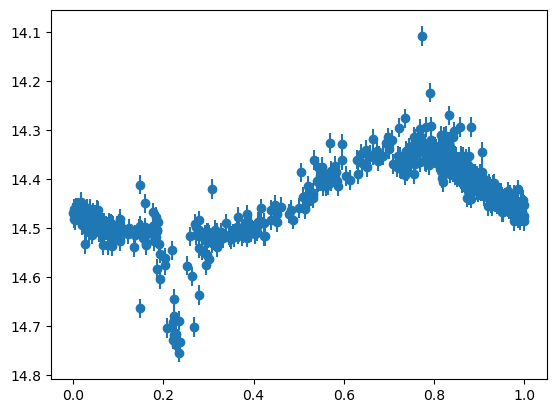

In [25]:
plt.errorbar(hjd % ztf_p / ztf_p, mag, mag_err, fmt = "o")
plt.gca().invert_yaxis()